<a href="https://colab.research.google.com/github/anandyadav819/kaggle-notebooks/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Datset - https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount("gdrive/")
#os.chdir("gdrive/My Drive/NLP/datasets/Disneyland Reviews/")
os.chdir("gdrive/My Drive/NLP/")

Mounted at gdrive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Huber, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
import tensorflow as tf
import json

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
! python -m spacy download en_core_web_md

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 96.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051305 sha256=b5c6801b48a3952aaba6debbad85694ba91943a7c1139bbb3502931d59837075
  Stored in directory: /tmp/pip-ephem-wheel-cache-vl4f_kjd/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
nlp = spacy.load('en', disable=["tagger", "parser"])

In [ ]:
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data_v1 = list(parse_data('datasets/Sarcasm/Sarcasm_Headlines_Dataset.json'))
data_v2 = list(parse_data('datasets/Sarcasm/Sarcasm_Headlines_Dataset_v2.json'))

In [ ]:
def create_dataframe(list_of_dicts):
  all_headlines = [i['headline'] for i in list_of_dicts]
  all_labels = [i['is_sarcastic'] for i in list_of_dicts]
  return pd.DataFrame({"Text":all_headlines, "Label":all_labels})

In [ ]:
train_df = create_dataframe(data_v1)
test_df = create_dataframe(data_v2)

In [ ]:
print(train_df.head())
print(test_df.head())

                                                Text  Label
0  former versace store clerk sues over secret 'b...      0
1  the 'roseanne' revival catches up to our thorn...      0
2  mom starting to fear son's web series closest ...      1
3  boehner just wants wife to listen, not come up...      1
4  j.k. rowling wishes snape happy birthday in th...      0
                                                Text  Label
0  thirtysomething scientists unveil doomsday clo...      1
1  dem rep. totally nails why congress is falling...      0
2  eat your veggies: 9 deliciously different recipes      0
3  inclement weather prevents liar from getting t...      1
4  mother comes pretty close to using word 'strea...      1


In [ ]:
print(train_df.shape, test_df.shape)
#data = pd.read_csv("datasets/Disneyland Reviews/DisneylandReviews.csv", encoding="ISO-8859-1")

(26709, 2) (28619, 2)


In [ ]:
all_data = pd.concat([train_df, test_df], axis=0)
print(all_data.shape)

(55328, 2)


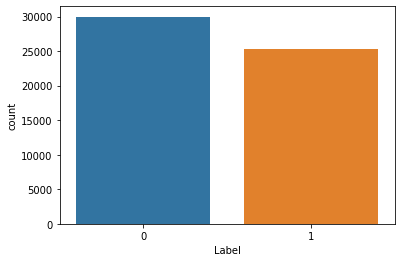

In [ ]:
sns.countplot(x='Label', data=all_data);

#Preprocessing

In [ ]:
def clean_text(x):
  
  #x = re.sub(r"\W", " ", x)
  x = re.sub(r"[0-9]", " ", x)
  x = re.sub(r"\s{2,}", " ", x)
  return x.strip()

def clean_text2(x):
  
  #x = re.sub(r"\W", " ", x)
  #x = re.sub(r"[0-9]", " ", x)
  x = re.sub(r"\s{2,}", " ", x)
  x = re.sub(r" s ", " ", x)
  
  return x.strip()


In [ ]:
#all_clean_text = [clean_text2(clean_text(i)) for i in all_data['Text'].tolist()]
all_clean_text = all_data['Text'].tolist()

In [ ]:
all_clean_text

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [ ]:
#Skipping removing stop words for now 

#Baseline - TFIDF with Logistic Regression

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(2, 3), max_df=1000, min_df=10)
tfidf.fit(all_clean_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1000, max_features=None,
                min_df=10, ngram_range=(2, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
tfidf_feats = tfidf.transform(all_clean_text)

In [ ]:
tfidf_feats.shape

(55328, 5576)

In [ ]:
trainx, testvalx, trainy, testvaly = train_test_split(tfidf_feats, all_data['Label'].tolist(), test_size=0.4)

In [ ]:
valx, testx, valy, testy = train_test_split(testvalx, testvaly, test_size=0.5)

In [ ]:
trainx.shape, valx.shape, testx.shape

((33196, 5576), (11066, 5576), (11066, 5576))

In [ ]:
lr = LogisticRegression(C=10)
lr.fit(trainx, trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Validation Set Score: {lr.score(valx, valy)}")
print(f"Test Set Score: {lr.score(testx, testy)}")

Validation Set Score: 0.7673052593529731
Test Set Score: 0.7645942526658233


In [ ]:
lasso = RandomForestClassifier(n_estimators=200)
lasso.fit(trainx, trainy)
print(f"Validation Set Score: {lasso.score(valx, valy)}")
print(f"Test Set Score: {lasso.score(testx, testy)}")

Validation Set Score: 0.7983011024760528
Test Set Score: 0.7975781673594795


#Sequential Model

In [ ]:
#Load pretrained GloVe embeddings
dict_w2v = {}
with open('glove.6B.100d.txt', "r") as file:
    for line in file:
        tokens = line.split()
        word = tokens[0]
        vector = np.array(tokens[1:], dtype=np.float32)
        if vector.shape[0] == 100:
            dict_w2v[word] = vector
        else:
            print("There was an issue with " + word)
# let's check the vocabulary size
print("Dictionary Size: ", len(dict_w2v))

Dictionary Size:  400000


In [ ]:
NUM_WORDS = 10000
NUM_CLS = 2

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters="")
tokenizer.fit_on_texts(all_clean_text)

In [ ]:
NUM_WORDS = len(tokenizer.word_index) + 1
print(NUM_WORDS)

38246


In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((NUM_WORDS, embedding_dim))

unk_cnt = 0
unk_set = set()
for word in tokenizer.word_index.keys():
    embedding_vector = dict_w2v.get(word)
    if embedding_vector is not None:
        tkn_id = tokenizer.word_index[word]
        embedding_matrix[tkn_id] = embedding_vector
    else:
        unk_cnt += 1
        unk_set.add(word)
# Print how many weren't found
print("Total unknown words: ", unk_cnt)

Total unknown words:  13190


In [ ]:
all_sequences = tokenizer.texts_to_sequences(all_clean_text)
all_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(all_sequences)

In [ ]:
train_x, valtest_x, train_y, valtest_y = train_test_split(all_padded_sequences, np.asarray(all_data['Label'].tolist(), dtype=np.int32), test_size=0.4)
val_x, test_x, val_y, test_y = train_test_split(valtest_x, valtest_y, test_size=0.5)

In [ ]:
print(train_x.shape, val_x.shape, test_x.shape, val_y.shape, train_y.shape, test_y.shape)
train_x, train_y = train_x[:(train_x.shape[0]//32)*32, :], train_y[:(train_y.shape[0]//32)*32]
val_x, val_y = val_x[:(val_x.shape[0]//32)*32, :], val_y[:(val_y.shape[0]//32)*32]
test_x, test_y = test_x[:(test_x.shape[0]//32)*32, :], test_y[:(test_y.shape[0]//32)*32]

(33196, 151) (11066, 151) (11066, 151) (11066,) (33196,) (11066,)


In [ ]:
class MergeHiddenStates(tf.keras.layers.Layer):
  def __init__(self):
    super(MergeHiddenStates, self).__init__()
  
  def call(self, inputs):
    #print(inputs)
    states = inputs#[0]
    return tf.reduce_mean(states, axis=1)

In [ ]:
def create_model(input_shape=(train_x.shape[1], ), vocabsize=NUM_WORDS, emb_dim=50, rnn_units=128, batch_size=32):
  model = tf.keras.Sequential([
                               tf.keras.layers.Embedding(
                                   vocabsize,
                                   emb_dim,
                                   mask_zero=False,
                                   batch_input_shape=(batch_size, input_shape[0]),
                                   weights=[embedding_matrix], trainable=True
                               ),
                               tf.keras.layers.Bidirectional(tf.keras.layers.GRU(rnn_units, dropout=0.2, return_sequences=True)),
                               MergeHiddenStates(),
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(NUM_CLS, activation='softmax')
  ])
  return model

def create_model_v2(input_shape=(train_x.shape[1], ), vocabsize=NUM_WORDS, emb_dim=100, rnn_units=128, batch_size=32):
  
  inp = tf.keras.layers.Input(shape=input_shape, batch_size=batch_size, dtype=tf.int32)
  emb_fixed = tf.keras.layers.Embedding(
                                    vocabsize,
                                    emb_dim,
                                    mask_zero=False,
                                    batch_input_shape=(batch_size, input_shape[0]),
                                    weights=[embedding_matrix], trainable=False)
  
  emb_train = tf.keras.layers.Embedding(
                                    vocabsize,
                                    emb_dim,
                                    mask_zero=False,
                                    batch_input_shape=(batch_size, input_shape[0]),
                                    weights=[embedding_matrix], trainable=True)
  
  rnn_unit = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(rnn_units, dropout=0.2, return_sequences=True))
  
  x1 = emb_fixed(inp)
  x2 = emb_train(inp)
  x = tf.keras.layers.Concatenate()([x1, x2])
  whole_sequence_output = rnn_unit(x)
  x = MergeHiddenStates()(whole_sequence_output)
  x = tf.keras.layers.Dropout(0.3)(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  preds = tf.keras.layers.Dense(NUM_CLS, activation='softmax')(x)
  model = tf.keras.Model(inputs=inp, outputs=preds)
  return model

In [ ]:
#model = create_model()
model = create_model_v2()
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(32, 151)]          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (32, 151, 100)       3824600     input_5[0][0]                    
__________________________________________________________________________________________________
embedding_9 (Embedding)         (32, 151, 100)       3824600     input_5[0][0]                    
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (32, 151, 200)       0           embedding_8[0][0]                
                                                                 embedding_9[0][0]          

In [ ]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(loss=loss_obj, optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, batch_size=32, epochs=5, validation_data=(val_x, val_y), shuffle=True)

Epoch 1/5
1037/1037 [==============================] - 56s 52ms/step - loss: 0.4875 - accuracy: 0.7404 - val_loss: 0.2366 - val_accuracy: 0.9044
Epoch 2/5
1037/1037 [==============================] - 52s 50ms/step - loss: 0.3480 - accuracy: 0.8984 - val_loss: 0.1862 - val_accuracy: 0.9298
Epoch 3/5
1037/1037 [==============================] - 49s 47ms/step - loss: 0.0822 - accuracy: 0.9727 - val_loss: 0.2083 - val_accuracy: 0.9322
Epoch 4/5
1037/1037 [==============================] - 49s 47ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.2157 - val_accuracy: 0.9407
Epoch 5/5
1037/1037 [==============================] - 49s 47ms/step - loss: 0.0261 - accuracy: 0.9905 - val_loss: 0.3103 - val_accuracy: 0.9438


In [ ]:
test_preds = np.argmax(model.predict(test_x, batch_size=32), axis=1)

In [ ]:
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5995
           1       0.93      0.95      0.94      5045

    accuracy                           0.95     11040
   macro avg       0.95      0.95      0.95     11040
weighted avg       0.95      0.95      0.95     11040



In [ ]:
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      5980
           1       0.91      0.96      0.93      5060

    accuracy                           0.94     11040
   macro avg       0.94      0.94      0.94     11040
weighted avg       0.94      0.94      0.94     11040



In [ ]:
# Let's test on some random samples from internet

In [ ]:
eval_sent = "Aim at nothing–you’ll hit it every time."

In [ ]:
eval_sent_clean = clean_text2(clean_text(eval_sent.lower()))

In [ ]:
eval_sent_clean

'aim at nothing–you’ll hit it every time.'

In [ ]:
eval_sequence = tokenizer.texts_to_sequences([eval_sent_clean])
eval_padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(eval_sequence, maxlen=151)

In [ ]:
eval_padded_sequence.shape

(1, 151)

In [ ]:
#eval_pred = np.argmax(model.predict(eval_padded_sequence, batch_size=1), axis=1)
eval_pred = model.predict(eval_padded_sequence, batch_size=1)

In [ ]:
eval_pred

array([[9.9986398e-01, 1.3598653e-04]], dtype=float32)

In [ ]:
all_data[all_data['Label']==1][600:680]["Text"].tolist()

['cancer topples chavez in bloodless coup',
 'exhibitionist zoo elephants waiting for crowd to gather before screwing',
 "website's built-in search engine just pathetic",
 'candidate to accuse opponent of racism just to see what happens',
 'area mofo announces plans to chill',
 "gunman opens fire in own mcdonald's",
 '45-year-old man self-conscious, embarrassed by new, unexpected changes his body going through',
 'woman feels guilty after switching brands',
 "vacationing detective just going to pretend like he didn't even see dead body in the woods",
 'trio of cutups attempts to hide horse from landlord',
 "military recruiter doesn't have to dig too far into bag of tricks to land this one",
 "'entertainment weekly' critic lets director redo 'sorority row' for better grade",
 'report: we could probably just have computer pick president',
 'grandma still swallowing okay, grandpa reports',
 'mother provides adult son with list of questions to ask doctor',
 'grumblethor the mischievous ple